In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat","dog", "deer", "frog", "horse", "ship", "truck"]

In [ ]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.xlabel(classes[int(y[index])])


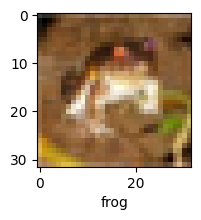

In [ ]:
plot_sample(x_train, y_train, 0)

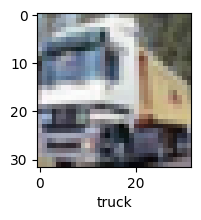

In [ ]:
plot_sample(x_train, y_train, 1)

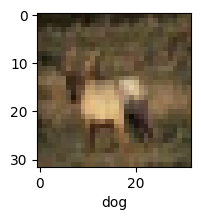

In [ ]:
plot_sample(x_train, y_train, 3)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3035 - loss: 1.9331
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4136 - loss: 1.6518
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4512 - loss: 1.5581
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4760 - loss: 1.4916
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4937 - loss: 1.4365


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.36      0.48      1000
           1       0.52      0.71      0.60      1000
           2       0.32      0.50      0.39      1000
           3       0.38      0.33      0.35      1000
           4       0.35      0.50      0.41      1000
           5       0.49      0.28      0.35      1000
           6       0.56      0.43      0.49      1000
           7       0.69      0.41      0.52      1000
           8       0.47      0.76      0.58      1000
           9       0.61      0.41      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(128, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x =layers.Conv2D(256, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

In [ ]:
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=30)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.3298 - loss: 1.7893
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5543 - loss: 1.2300
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6322 - loss: 1.0337
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6692 - loss: 0.9315
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.7008 - loss: 0.8537
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7166 - loss: 0.8062
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7330 - loss: 0.7565
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7517 - loss: 0.7072
Epoch 9/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7573 - loss: 0.6983
Epoch 10/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7693 - loss: 0.6583
Epoch 11/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7779 - loss: 0.6362
Epoch 12/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7856 - loss: 0.7150


[0.7124545574188232, 0.7840999960899353]

In [117]:
y_pred = model.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.5741532e-03, 8.7074846e-01, 7.2296018e-05, 3.1727441e-02,
        1.0109391e-05, 3.4058783e-02, 9.5203135e-04, 2.8667078e-04,
        8.3834939e-03, 5.1186647e-02],
       [8.1585851e-05, 5.6619979e-02, 6.1884393e-08, 7.7214196e-08,
        5.7968226e-09, 2.8892972e-09, 3.1192047e-09, 3.9624504e-09,
        9.4299436e-01, 3.0402135e-04],
       [1.1528528e-02, 3.3829011e-02, 3.3606444e-05, 1.1909873e-04,
        2.4157364e-03, 7.4988435e-07, 1.2536177e-05, 3.9945233e-05,
        9.1271079e-01, 3.9310027e-02],
       [9.9463636e-01, 2.0016078e-05, 1.9946164e-03, 3.7782948e-04,
        1.5515662e-04, 3.5318328e-07, 1.1980070e-05, 1.4786571e-05,
        2.7260128e-03, 6.2751140e-05],
       [1.5778474e-11, 3.0624364e-10, 1.6078858e-04, 7.7258737e-05,
        3.0904221e-03, 1.0008364e-06, 9.9667054e-01, 3.3199253e-08,
        2.8212903e-11, 1.6146419e-08]], dtype=float32)

In [118]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(1), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [119]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [120]:
def plot_prediction(x, y_true, y_pred, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.title(f"Gerçek: {classes[int(y_true[index])]} - Tahmin: {classes[y_pred[index]]}")


/tmp/ipython-input-2255553634.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Gerçek: {classes[int(y_true[index])]} - Tahmin: {classes[y_pred[index]]}")


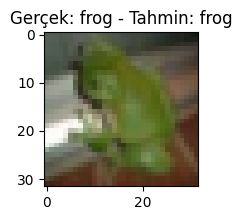

In [121]:
plot_prediction(x_test, y_test, y_classes, 7)